In [1]:
import sys
print(sys.executable)  # This should point to your "ultra" environment's Python executable
print(sys.path)        # Check if the paths point to your "ultra" environment


D:\Anaconda\envs\mor\python.exe
['D:\\Anaconda\\envs\\mor\\python311.zip', 'D:\\Anaconda\\envs\\mor\\DLLs', 'D:\\Anaconda\\envs\\mor\\Lib', 'D:\\Anaconda\\envs\\mor', '', 'D:\\Anaconda\\envs\\mor\\Lib\\site-packages', 'D:\\Anaconda\\envs\\mor\\Lib\\site-packages\\win32', 'D:\\Anaconda\\envs\\mor\\Lib\\site-packages\\win32\\lib', 'D:\\Anaconda\\envs\\mor\\Lib\\site-packages\\Pythonwin']


In [2]:
import pandas as pd
import numpy as np
# Helper function to load data from CSV
def load_data_from_csv(csv_file):
    # Read the CSV into a DataFrame
    df = pd.read_csv(csv_file)

    # Assuming the CSV has columns like 'id', 'label', and other features
    return df

# Path to the CSV file
csv_file = './kag_risk_factors_cervical_cancer.csv'  # Replace with your actual CSV path

# Load the data from the CSV file into a DataFrame
df = load_data_from_csv(csv_file)

# Example of viewing the data
print(df.head())
print(f'DataFrame Size: {df.shape}')

   Age Number of sexual partners First sexual intercourse Num of pregnancies  \
0   18                       4.0                     15.0                1.0   
1   15                       1.0                     14.0                1.0   
2   34                       1.0                        ?                1.0   
3   52                       5.0                     16.0                4.0   
4   46                       3.0                     21.0                4.0   

  Smokes Smokes (years) Smokes (packs/year) Hormonal Contraceptives  \
0    0.0            0.0                 0.0                     0.0   
1    0.0            0.0                 0.0                     0.0   
2    0.0            0.0                 0.0                     0.0   
3    1.0           37.0                37.0                     1.0   
4    0.0            0.0                 0.0                     1.0   

  Hormonal Contraceptives (years)  IUD  ... STDs: Time since first diagnosis  \
0           

In [3]:
import pandas as pd

# Helper function to load data and count unknown values ('?') in each column
def count_unknowns_per_column(df):
    # Count the number of '?' in each column
    unknowns_per_column = df.isin(['?']).sum()  # Sum of '?' occurrences for each column
    return unknowns_per_column



# Get the count of '?' in each column
unknowns_per_column = count_unknowns_per_column(df)

# Display the counts for each column
print("Count of '?' in each column:")
print(unknowns_per_column)


Count of '?' in each column:
Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:

In [4]:
# Drop the specified columns
columns_to_drop = ['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis']
df = df.drop(columns=columns_to_drop, errors='ignore')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [7]:
print(df.head())

   Age Number of sexual partners First sexual intercourse Num of pregnancies  \
0   18                       4.0                     15.0                1.0   
1   15                       1.0                     14.0                1.0   
2   34                       1.0                        ?                1.0   
3   52                       5.0                     16.0                4.0   
4   46                       3.0                     21.0                4.0   

  Smokes Smokes (years) Smokes (packs/year) Hormonal Contraceptives  \
0    0.0            0.0                 0.0                     0.0   
1    0.0            0.0                 0.0                     0.0   
2    0.0            0.0                 0.0                     0.0   
3    1.0           37.0                37.0                     1.0   
4    0.0            0.0                 0.0                     1.0   

  Hormonal Contraceptives (years)  IUD  ... STDs:HPV  \
0                             0.0  0

In [8]:
count_ones = df['Dx'].sum()
print(f'Number of 1s in the dx label: {count_ones}')

Number of 1s in the dx label: 24


In [9]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Step 1: Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Step 2: Convert all columns to float to ensure consistency in numeric representation
df = df.astype(float)

# Step 3: Remove Dx columns from features (X) and use them as labels (y)
label_cols = [col for col in df.columns if col.startswith('Dx')]
X = df.drop(columns=label_cols)  # Features, excluding 'Dx' columns
y = df['Dx']  # Labels (Dx columns only)

# Step 4: Define numeric columns (all columns are numeric now)
numeric_cols = X.columns  # All remaining columns in X are numeric

# Define numeric transformer (impute and scale)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Replace missing numeric data with median
    ('scaler', StandardScaler())  # Scale the numeric data
])

# Step 5: Apply the transformation to numeric columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols)
    ]
)




In [10]:
# Step 4: Split the data into features (X) and multi-label target (y)



# Display the shapes to verify
print("Features (X) shape:", X.shape)
print("Targets (y) shape:", y.shape)
print(y.info())
print(X.info())

Features (X) shape: (858, 30)
Targets (y) shape: (858,)
<class 'pandas.core.series.Series'>
RangeIndex: 858 entries, 0 to 857
Series name: Dx
Non-Null Count  Dtype  
--------------  -----  
858 non-null    float64
dtypes: float64(1)
memory usage: 6.8 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    float64
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-nu

In [11]:
train_data = X.copy()
train_data['Dx'] = y

In [12]:
# Verify columns in X
print("Columns in train_data:", train_data.columns)
print("Numeric columns in transformer:", numeric_cols)


Columns in train_data: Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Hinselmann', 'Schiller', 'Citology', 'Biopsy', 'Dx'],
      dtype='object')
Numeric columns in transformer: Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'I

D:\Anaconda\envs\mor\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Number of elements in the training set: 686
Number of elements in the testing set: 172


  0%|          | 39/1000000 [00:01<11:54:08, 23.34it/s]


Learned structure: [('Num of pregnancies', 'IUD'), ('Smokes', 'Smokes (years)'), ('Smokes', 'Smokes (packs/year)'), ('Smokes', 'Number of sexual partners'), ('Smokes', 'STDs:vulvo-perineal condylomatosis'), ('Smokes', 'Schiller'), ('Hormonal Contraceptives', 'Num of pregnancies'), ('Hormonal Contraceptives (years)', 'Hormonal Contraceptives'), ('IUD', 'IUD (years)'), ('IUD', 'Smokes'), ('IUD', 'Dx'), ('IUD', 'STDs:vulvo-perineal condylomatosis'), ('IUD', 'Hinselmann'), ('STDs', 'STDs: Number of diagnosis'), ('STDs', 'STDs:HPV'), ('STDs (number)', 'STDs'), ('STDs (number)', 'STDs:syphilis'), ('STDs (number)', 'STDs:HIV'), ('STDs:condylomatosis', 'STDs (number)'), ('STDs:condylomatosis', 'STDs:vaginal condylomatosis'), ('STDs:cervical condylomatosis', 'First sexual intercourse'), ('STDs:cervical condylomatosis', 'Citology'), ('STDs:cervical condylomatosis', 'Schiller'), ('STDs:vulvo-perineal condylomatosis', 'STDs:condylomatosis'), ('STDs:AIDS', 'Age'), ('STDs:AIDS', 'Number of sexual pa

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 1: {'Age': 20.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 16.0, 'Num of pregnancies': 4.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 3.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 2: {'Age': 17.0, 'Number of sexual partners': 5.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 3: {'Age': 36.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 22.0, 'Num of pregnancies': 4.0, 'Smokes': 1.0, 'Smokes (years)': 16.0, 'Smokes (packs/year)': 4.8, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 1.0, 'STDs (number)': 3.0, 'STDs:condylomatosis': 1.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 1.0, 'STDs:vulvo-perineal condylomatosis': 1.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 1.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}
Error predicting for index 3: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Evidence for index 4: {'Age': 15.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 13.0, 'Num of pregnancies': 1.0, 'Smokes': 1.0, 'Smokes (years)': 1.0, '

Eliminating: STDs:AIDS: 100%|██████████| 9/9 [00:00<00:00, 2250.83it/s]               


Evidence for index 5: {'Age': 31.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 19.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 0.08, 'IUD': 1.0, 'IUD (years)': 8.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 6: {'Age': 44.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 23.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Eliminating: STDs:AIDS: 100%|██████████| 10/10 [00:00<00:00, 2000.14it/s]              


Evidence for index 7: {'Age': 36.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 16.0, 'Num of pregnancies': 3.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 11.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 8: {'Age': 43.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 5.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 1.0, 'IUD (years)': 8.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 9: {'Age': 15.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 13.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 1.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 1.0, 'STDs (number)': 1.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 1.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 1.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 10: {'Age': 34.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 19.0, 'Num of pregnancies': 3.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 5.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 11: {'Age': 22.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 19.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Eliminating: STDs:AIDS: 100%|██████████| 9/9 [00:00<00:00, 2858.02it/s]               


Evidence for index 12: {'Age': 17.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 13: {'Age': 35.0, 'Number of sexual partners': 5.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 10.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 14: {'Age': 19.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 16.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 15: {'Age': 30.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 4.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 12.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 16: {'Age': 19.0, 'Number of sexual partners': 4.0, 'First sexual intercourse': 14.0, 'Num of pregnancies': 1.0, 'Smokes': 1.0, 'Smokes (years)': 7.0, 'Smokes (packs/year)': 0.5132021277, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Eliminating: STDs:AIDS: 100%|██████████| 9/9 [00:00<00:00, 2424.92it/s]               


Evidence for index 17: {'Age': 23.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 2.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 18: {'Age': 21.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 14.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 4.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 19: {'Age': 18.0, 'First sexual intercourse': 16.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Eliminating: STDs:AIDS: 100%|██████████| 9/9 [00:00<00:00, 4430.08it/s]               


Evidence for index 20: {'Age': 23.0, 'Number of sexual partners': 5.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 1.0, 'Smokes': 1.0, 'Smokes (years)': 8.0, 'Smokes (packs/year)': 4.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 8.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}
Error predicting for index 20: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Evidence for index 21: {'Age': 29.0, 'First sexual intercourse': 19.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'STDs

Eliminating: STDs:AIDS: 100%|██████████| 9/9 [00:00<00:00, 2250.83it/s]               


Evidence for index 22: {'Age': 15.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 14.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 23: {'Age': 21.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 3.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 1.0, 'Schiller': 1.0, 'Citology': 0.0, 'Biopsy': 1.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 24: {'Age': 24.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 3.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 4.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 1.0, 'STDs (number)': 1.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 1.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 1.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 25: {'Age': 24.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 21.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 1.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 26: {'Age': 24.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 16.0, 'Num of pregnancies': 3.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 5.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 27: {'Age': 30.0, 'Number of sexual partners': 5.0, 'First sexual intercourse': 16.0, 'Num of pregnancies': 4.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 1.0, 'IUD (years)': 7.0, 'STDs': 1.0, 'STDs (number)': 1.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 1.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 1.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 1.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 28: {'Age': 29.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 7.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 29: {'Age': 24.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 19.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 30: {'Age': 37.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 3.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 0.25, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 31: {'Age': 15.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 14.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 1.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 32: {'Age': 27.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 16.0, 'Num of pregnancies': 3.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 0.41, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Error predicting for index 32: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Evidence for index 33: {'Age': 17.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 13.0, 'Num of pregnancies': 1.0, 'Smokes': 1.0, 'Smokes (years)': 2.0, 'Smokes (packs/year)': 1.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 34: {'Age': 39.0, 'Number of sexual partners': 4.0, 'First sexual intercourse': 29.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 0.08, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 35: {'Age': 32.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 5.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 0.33, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 36: {'Age': 84.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 20.0, 'Num of pregnancies': 11.0, 'Smokes': 1.0, 'Smokes (years)': 24.0, 'Smokes (packs/year)': 0.5132021277, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 1.0, 'Citology': 0.0, 'Biopsy': 0.0}
Error predicting for index 36: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Evidence for index 37: {'Age': 22.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (ye

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 38: {'Age': 29.0, 'Number of sexual partners': 8.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 2.0, 'Smokes': 1.0, 'Smokes (years)': 14.0, 'Smokes (packs/year)': 2.8, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 39: {'Age': 25.0, 'Number of sexual partners': 5.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 4.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 3.0, 'IUD': 1.0, 'IUD (years)': 2.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 40: {'Age': 33.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 21.0, 'Num of pregnancies': 0.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 41: {'Age': 24.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 3.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 6.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 42: {'Age': 23.0, 'Number of sexual partners': 4.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 1.0, 'Smokes': 1.0, 'Smokes (years)': 4.0, 'Smokes (packs/year)': 0.5132021277, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 2.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 43: {'Age': 48.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 16.0, 'Num of pregnancies': 7.0, 'Smokes': 1.0, 'Smokes (years)': 32.0, 'Smokes (packs/year)': 8.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 7.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}
Error predicting for index 43: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Evidence for index 44: {'Age': 35.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 20.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 45: {'Age': 41.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 5.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 1.0, 'IUD': 1.0, 'IUD (years)': 4.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 46: {'Age': 18.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 14.0, 'Num of pregnancies': 1.0, 'Smokes': 1.0, 'Smokes (years)': 3.0, 'Smokes (packs/year)': 0.45, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}
Error predicting for index 46: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Evidence for index 47: {'Age': 30.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 6.0, 'I

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 48: {'Age': 26.0, 'Number of sexual partners': 10.0, 'First sexual intercourse': 16.0, 'Num of pregnancies': 1.0, 'Smokes': 1.0, 'Smokes (years)': 9.0, 'Smokes (packs/year)': 0.5132021277, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Error predicting for index 48: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Evidence for index 49: {'Age': 16.0, 'Number of sexual partners': 28.0, 'First sexual intercourse': 10.0, 'Num of pregnancies': 1.0, 'Smokes': 1.0, 'Smokes (years)': 5.0, 'Smokes (packs/year)': 5.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}
Error predicting for index 49: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Evidence for index 

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 51: {'Age': 16.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 52: {'Age': 23.0, 'Number of sexual partners': 5.0, 'First sexual intercourse': 16.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 0.25, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 53: {'Age': 29.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 3.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 1.0, 'STDs (number)': 1.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 1.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 1.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 54: {'Age': 34.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 1.0, 'Smokes': 1.0, 'Smokes (years)': 9.0, 'Smokes (packs/year)': 4.5, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Eliminating: STDs:AIDS: 100%|██████████| 9/9 [00:00<00:00, 1500.05it/s]               


Evidence for index 55: {'Age': 35.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 21.0, 'Num of pregnancies': 5.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 56: {'Age': 16.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 14.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 57: {'Age': 15.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 14.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 58: {'Age': 21.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 1.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 59: {'Age': 23.0, 'Number of sexual partners': 5.0, 'First sexual intercourse': 20.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 1.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 60: {'Age': 27.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 14.0, 'Num of pregnancies': 3.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 1.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 61: {'Age': 25.0, 'Number of sexual partners': 5.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 4.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 3.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 62: {'Age': 23.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 63: {'Age': 23.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 19.0, 'Num of pregnancies': 3.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 1.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 64: {'Age': 21.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 0.25, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 65: {'Age': 21.0, 'Number of sexual partners': 5.0, 'First sexual intercourse': 16.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 0.42, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 66: {'Age': 21.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 14.0, 'Num of pregnancies': 3.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 1.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 1.0, 'Schiller': 1.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 67: {'Age': 30.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 19.0, 'Num of pregnancies': 3.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'STDs': 1.0, 'STDs (number)': 1.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 1.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 1.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Eliminating: IUD: 100%|██████████| 1/1 [00:00<00:00, 1000.31it/s]


Evidence for index 68: {'Age': 70.0, 'Number of sexual partners': 4.0, 'First sexual intercourse': 27.0, 'Num of pregnancies': 3.0, 'Smokes': 1.0, 'Smokes (years)': 3.0, 'Smokes (packs/year)': 0.75, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 69: {'Age': 33.0, 'Number of sexual partners': 4.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 2.0, 'Smokes': 1.0, 'Smokes (years)': 14.0, 'Smokes (packs/year)': 3.5, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 0.08, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}
Error predicting for index 69: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Evidence for index 70: {'Age': 28.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 23.0, 'Num of pregnancies': 3.0, 'Smokes': 0.0, 'Smokes (years)': 0.

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 71: {'Age': 19.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 14.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Eliminating: STDs:AIDS: 100%|██████████| 9/9 [00:00<00:00, 1489.10it/s]               


Evidence for index 72: {'Age': 40.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 0.25, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 1.0, 'STDs (number)': 2.0, 'STDs:condylomatosis': 1.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 1.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 1.0, 'Hinselmann': 0.0, 'Schiller': 1.0, 'Citology': 1.0, 'Biopsy': 1.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 73: {'Age': 23.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 74: {'Age': 36.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 3.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 0.25, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 75: {'Age': 21.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 3.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 0.5, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 76: {'Age': 37.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 24.0, 'Num of pregnancies': 1.0, 'Smokes': 1.0, 'Smokes (years)': 3.0, 'Smokes (packs/year)': 0.04, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}
Error predicting for index 76: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Evidence for index 77: {'Age': 19.0, 'Number of sexual partners': 4.0, 'First sexual intercourse': 14.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0

Eliminating: STDs:AIDS: 100%|██████████| 9/9 [00:00<00:00, 1285.59it/s]               


Evidence for index 78: {'Age': 17.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 0.16, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 79: {'Age': 24.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 3.0, 'Smokes': 1.0, 'Smokes (years)': 8.0, 'Smokes (packs/year)': 2.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 4.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 80: {'Age': 28.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 20.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 1.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 81: {'Age': 34.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 19.0, 'Num of pregnancies': 3.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 5.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 82: {'Age': 25.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 7.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 83: {'Age': 36.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 28.0, 'Num of pregnancies': 1.0, 'Smokes': 1.0, 'Smokes (years)': 16.0, 'Smokes (packs/year)': 2.4, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 1.0, 'STDs (number)': 3.0, 'STDs:condylomatosis': 1.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 1.0, 'STDs:vulvo-perineal condylomatosis': 1.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 1.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}
Error predicting for index 83: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Evidence for index 84: {'Age': 33.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 3.0, 'Smokes': 0.0, 'Smokes (years)': 0.0

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 85: {'Age': 22.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 13.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 0.25, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 86: {'Age': 26.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 16.0, 'Num of pregnancies': 3.0, 'Smokes': 1.0, 'Smokes (years)': 11.0, 'Smokes (packs/year)': 2.2, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 2.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}
Error predicting for index 86: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Evidence for index 87: {'Age': 24.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 2.0, 'Smokes': 1.0, 'Smokes (years)': 1.2

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 88: {'Age': 32.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 19.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 0.25, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 89: {'Age': 35.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 2.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 90: {'Age': 36.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 3.0, 'Smokes': 1.0, 'Smokes (years)': 1.266972909, 'Smokes (packs/year)': 2.4, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 9.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}
Error predicting for index 90: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Evidence for index 91: {'Age': 28.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 92: {'Age': 15.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Eliminating: STDs:AIDS: 100%|██████████| 9/9 [00:00<00:00, 1125.01it/s]               


Evidence for index 93: {'Age': 22.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 1.0, 'STDs (number)': 2.0, 'STDs:condylomatosis': 1.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 1.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 1.0, 'Schiller': 1.0, 'Citology': 0.0, 'Biopsy': 1.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 94: {'Age': 19.0, 'Number of sexual partners': 4.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 95: {'Age': 32.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 10.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 96: {'Age': 24.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 14.0, 'Num of pregnancies': 0.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 97: {'Age': 23.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 19.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 0.67, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 98: {'Age': 34.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 26.0, 'Num of pregnancies': 3.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 2.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 99: {'Age': 18.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 100: {'Age': 29.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 14.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 2.0, 'IUD': 1.0, 'IUD (years)': 0.91, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 1.0, 'Schiller': 1.0, 'Citology': 0.0, 'Biopsy': 0.0}
Error predicting for index 100: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Evidence for index 101: {'Age': 18.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 102: {'Age': 25.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 0.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 0.08, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 1.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 103: {'Age': 18.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 3.0, 'Smokes': 1.0, 'Smokes (years)': 7.0, 'Smokes (packs/year)': 3.5, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 1.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 1.0, 'Biopsy': 0.0}
Error predicting for index 103: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Evidence for index 104: {'Age': 33.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 19.0, 'Num of pregnancies': 0.0, 'Smokes': 0.0, 'Smokes (years)': 0

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 105: {'Age': 24.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 13.0, 'Num of pregnancies': 5.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 2.0, 'IUD': 1.0, 'IUD (years)': 3.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 106: {'Age': 30.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 3.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Eliminating: STDs:AIDS: 100%|██████████| 9/9 [00:00<00:00, 1499.81it/s]               

Evidence for index 107: {'Age': 21.0, 'Number of sexual partners': 4.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 3.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 3.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 108: {'Age': 21.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 109: {'Age': 15.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 14.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 110: {'Age': 23.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 19.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 0.5, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 111: {'Age': 23.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 19.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 112: {'Age': 33.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 29.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 0.5, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 1.0, 'Citology': 1.0, 'Biopsy': 1.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 113: {'Age': 20.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 1.0, 'Smokes': 1.0, 'Smokes (years)': 13.0, 'Smokes (packs/year)': 7.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 1.0, 'STDs (number)': 2.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 1.0, 'STDs:Hepatitis B': 1.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 1.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}
Error predicting for index 113: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Evidence for index 114: {'Age': 29.0, 'Number of sexual partners': 5.0, 'First sexual intercourse': 20.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 115: {'Age': 29.0, 'Number of sexual partners': 4.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 3.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 1.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 116: {'Age': 26.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 20.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 6.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 117: {'Age': 35.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 3.0, 'Smokes': 1.0, 'Smokes (years)': 20.0, 'Smokes (packs/year)': 2.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 2.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}
Error predicting for index 117: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Evidence for index 118: {'Age': 40.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 119: {'Age': 19.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 16.0, 'Smokes': 1.0, 'Smokes (years)': 1.0, 'Smokes (packs/year)': 0.04, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}
Error predicting for index 119: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Evidence for index 120: {'Age': 24.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 19.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 2.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV':

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 121: {'Age': 33.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 6.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 122: {'Age': 20.0, 'First sexual intercourse': 16.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 123: {'Age': 19.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 124: {'Age': 16.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 13.0, 'Num of pregnancies': 2.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 125: {'Age': 23.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 19.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Eliminating: STDs:AIDS: 100%|██████████| 9/9 [00:00<00:00, 1285.06it/s]               


Evidence for index 126: {'Age': 14.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 14.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 127: {'Age': 39.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 4.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 8.0, 'IUD': 1.0, 'IUD (years)': 3.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 1.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 128: {'Age': 34.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 7.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 0.08, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 129: {'Age': 21.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 4.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 130: {'Age': 23.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 16.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 131: {'Age': 19.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 1.0, 'Smokes': 1.0, 'Smokes (years)': 7.0, 'Smokes (packs/year)': 12.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 1.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 132: {'Age': 20.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Eliminating: STDs:AIDS: 100%|██████████| 9/9 [00:00<00:00, 1285.28it/s]               


Evidence for index 133: {'Age': 28.0, 'Number of sexual partners': 5.0, 'First sexual intercourse': 14.0, 'Num of pregnancies': 4.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 3.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 1.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 134: {'Age': 26.0, 'Number of sexual partners': 5.0, 'First sexual intercourse': 18.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 1.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Eliminating: IUD: 100%|██████████| 2/2 [00:00<00:00, 999.60it/s]      


Evidence for index 135: {'Age': 26.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 19.0, 'Num of pregnancies': 1.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Eliminating: IUD: 100%|██████████| 2/2 [00:00<00:00, 666.50it/s]


Evidence for index 136: {'Age': 37.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 5.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 1.0, 'IUD': 1.0, 'IUD (years)': 0.5, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 137: {'Age': 17.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Eliminating: STDs:AIDS: 100%|██████████| 9/9 [00:00<00:00, 1285.41it/s]               


Evidence for index 138: {'Age': 19.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 14.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 1.5, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 139: {'Age': 25.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 14.0, 'Num of pregnancies': 3.0, 'Smokes': 1.0, 'Smokes (years)': 5.0, 'Smokes (packs/year)': 0.4, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 7.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}
Error predicting for index 139: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Evidence for index 140: {'Age': 39.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 4.0, 'Smokes': 0.0, 'Smokes (years)': 0

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 141: {'Age': 41.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 3.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Eliminating: STDs:AIDS: 100%|██████████| 9/9 [00:00<00:00, 1125.05it/s]               


Evidence for index 142: {'Age': 18.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 0.25, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 143: {'Age': 38.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 4.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 16.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 1.0, 'Citology': 0.0, 'Biopsy': 1.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

Evidence for index 144: {'Age': 44.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 25.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 145: {'Age': 33.0, 'Number of sexual partners': 5.0, 'First sexual intercourse': 19.0, 'Num of pregnancies': 1.0, 'Smokes': 1.0, 'Smokes (years)': 4.0, 'Smokes (packs/year)': 0.5132021277, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 2.282200521, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 146: {'Age': 29.0, 'Number of sexual partners': 5.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 6.0, 'Smokes': 1.0, 'Smokes (years)': 1.266972909, 'Smokes (packs/year)': 1.3, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 0.5, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 1.0, 'STDs (number)': 1.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 1.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 1.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}
Error predicting for index 146: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Evidence for index 147: {'Age': 24.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (ye

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 148: {'Age': 34.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 4.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 149: {'Age': 46.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 21.0, 'Num of pregnancies': 4.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 15.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 150: {'Age': 25.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 151: {'Age': 33.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 32.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}
Error predicting for index 151: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Evidence for index 152: {'Age': 32.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 153: {'Age': 41.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 4.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 10.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 1.0, 'STDs (number)': 1.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 1.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 1.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 154: {'Age': 28.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 6.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 155: {'Age': 27.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 19.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 7.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 156: {'Age': 18.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 4.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 5.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 157: {'Age': 29.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 2.0, 'Smokes': 1.0, 'Smokes (years)': 13.0, 'Smokes (packs/year)': 0.37, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 0.25, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}
Error predicting for index 157: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Evidence for index 158: {'Age': 30.0, 'First sexual intercourse': 13.0, 'Num of pregnancies': 3.0, 'Smokes': 1.0, 'Smokes (years)': 22.0, 'Smokes (packs/year)': 3.3

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 160: {'Age': 20.0, 'Number of sexual partners': 4.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 5.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 161: {'Age': 22.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 1.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Eliminating: STDs:AIDS: 100%|██████████| 11/11 [00:00<00:00, 1375.06it/s]              


Evidence for index 162: {'Age': 15.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 163: {'Age': 27.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 26.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 164: {'Age': 28.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 24.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 0.5, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 165: {'Age': 15.0, 'Number of sexual partners': 4.0, 'First sexual intercourse': 12.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 1.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 166: {'Age': 20.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Eliminating: STDs:AIDS: 100%|██████████| 9/9 [00:00<00:00, 1500.53it/s]               


Evidence for index 167: {'Age': 37.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 4.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 12.0, 'IUD': 1.0, 'IUD (years)': 0.16, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}
Error predicting for index 167: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Evidence for index 168: {'Age': 24.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 19.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)':

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 169: {'Age': 25.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 3.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 170: {'Age': 27.0, 'Number of sexual partners': 4.0, 'First sexual intercourse': 16.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 171: {'Age': 29.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 17.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Eliminating: STDs:AIDS: 100%|██████████| 10/10 [00:00<00:00, 909.14it/s]               
D:\Anaconda\envs\mor\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\envs\mor\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\envs\mor\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{met

Evaluating model performance...
Confusion Matrix:
[[143   0]
 [  5   0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       143
         1.0       0.00      0.00      0.00         5

    accuracy                           0.97       148
   macro avg       0.48      0.50      0.49       148
weighted avg       0.93      0.97      0.95       148



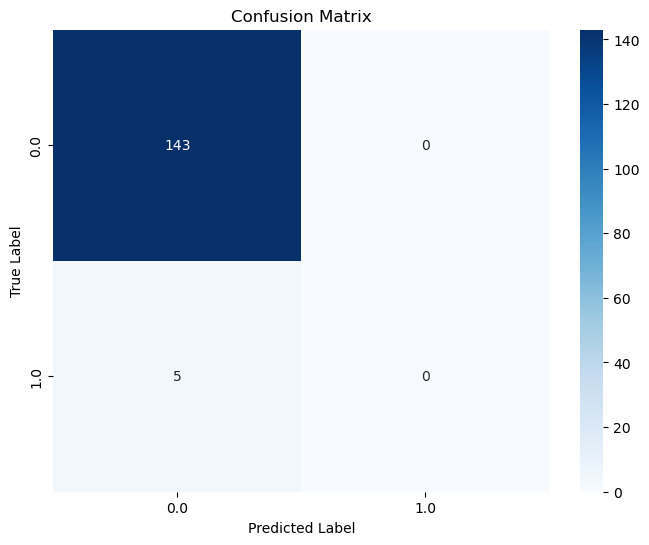

Accuracy: 0.97


In [13]:
import pandas as pd
import numpy as np
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import HillClimbSearch, BicScore, MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'train_data' is your original dataset that includes 'Dx' as the target variable.




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the number of elements in the training and testing sets
print(f"Number of elements in the training set: {X_train.shape[0]}")
print(f"Number of elements in the testing set: {X_test.shape[0]}")

# Step 2: Perform structure learning on the training data
hc = HillClimbSearch(pd.concat([X_train, y_train], axis=1))  # Concatenate to include the target for structure learning
best_model = hc.estimate(scoring_method=BicScore(pd.concat([X_train, y_train], axis=1)))

# Display learned structure
print("Learned structure:", best_model.edges())

# Step 3: Create Bayesian Network with learned structure
model = BayesianNetwork(best_model.edges())

# Fit the model to the training data with Maximum Likelihood Estimator
model.fit(pd.concat([X_train, y_train], axis=1), estimator=MaximumLikelihoodEstimator)
inference = VariableElimination(model)

# Step 4: Prepare the test data for predictions
model_nodes = set(model.nodes())
X_test_filtered = X_test.loc[:, X_test.columns.intersection(model_nodes)]
print(X_test_filtered.isnull().sum())

# Initialize predictions list
y_pred = []

# Step 5: Make predictions on the test set
for i in range(len(X_test_filtered)):
    # Filter evidence to include only model nodes and drop NaNs
    evidence = {k: v for k, v in X_test_filtered.iloc[i].to_dict().items() if k in model_nodes and pd.notna(v)}

    # Debugging: Print the evidence for the current test instance
    print(f"Evidence for index {i}: {evidence}")

    # Ensure evidence is not empty
    if evidence:
        try:
            prediction = inference.map_query(variables=['Dx'], evidence=evidence)
            y_pred.append(prediction['Dx'])
        except Exception as e:
            print(f"Error predicting for index {i}: {e}")
            y_pred.append(None)  # Append None or a default value if prediction fails
    else:
        print(f"No valid evidence for index {i}, skipping prediction.")
        y_pred.append(None)

# Step 6: Evaluate the model performance
if y_pred:
    print("Evaluating model performance...")
    # Ensure the predictions and true values are of the same length
    y_true = y_test.values  # True values from the test set
    # Filter None values from predictions and true values
    valid_indices = [index for index, pred in enumerate(y_pred) if pred is not None]
    y_pred_valid = [y_pred[index] for index in valid_indices]
    y_true_valid = [y_true[index] for index in valid_indices]
    
    # Ensure y_pred_valid and y_true_valid are of equal length for evaluation
    if len(y_pred_valid) == len(y_true_valid):
        # Calculate confusion matrix and classification report
        cm = confusion_matrix(y_true_valid, y_pred_valid)
        report = classification_report(y_true_valid, y_pred_valid)

        # Print confusion matrix and classification report
        print("Confusion Matrix:")
        print(cm)
        print("\nClassification Report:")
        print(report)

        # Visualize the confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title('Confusion Matrix')
        plt.show()

        # Calculate accuracy
        accuracy = accuracy_score(y_true_valid, y_pred_valid)
        print(f'Accuracy: {accuracy:.2f}')
    else:
        print("Mismatch in lengths of predictions and true values after filtering.")
else:
    print("No predictions were made.")


Number of elements in the training set: 686
Number of elements in the testing set: 172


  0%|          | 39/1000000 [00:03<25:21:32, 10.95it/s]


Learned structure: [('Num of pregnancies', 'IUD'), ('Smokes', 'Smokes (years)'), ('Smokes', 'Smokes (packs/year)'), ('Smokes', 'Number of sexual partners'), ('Smokes', 'STDs:vulvo-perineal condylomatosis'), ('Smokes', 'Schiller'), ('Hormonal Contraceptives', 'Num of pregnancies'), ('Hormonal Contraceptives (years)', 'Hormonal Contraceptives'), ('IUD', 'IUD (years)'), ('IUD', 'Smokes'), ('IUD', 'Dx'), ('IUD', 'STDs:vulvo-perineal condylomatosis'), ('IUD', 'Hinselmann'), ('STDs', 'STDs: Number of diagnosis'), ('STDs', 'STDs:HPV'), ('STDs (number)', 'STDs'), ('STDs (number)', 'STDs:syphilis'), ('STDs (number)', 'STDs:HIV'), ('STDs:condylomatosis', 'STDs (number)'), ('STDs:condylomatosis', 'STDs:vaginal condylomatosis'), ('STDs:cervical condylomatosis', 'First sexual intercourse'), ('STDs:cervical condylomatosis', 'Citology'), ('STDs:cervical condylomatosis', 'Schiller'), ('STDs:vulvo-perineal condylomatosis', 'STDs:condylomatosis'), ('STDs:AIDS', 'Age'), ('STDs:AIDS', 'Number of sexual pa

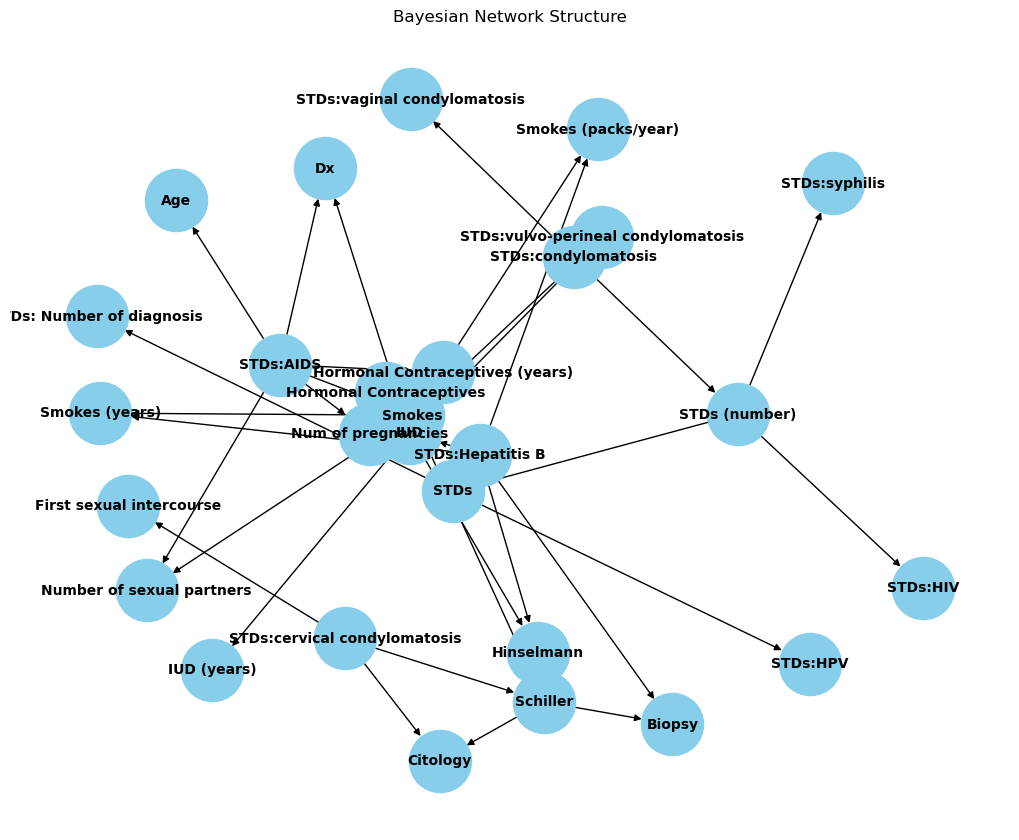

Age                                    0
Number of sexual partners              5
First sexual intercourse               1
Num of pregnancies                     6
Smokes                                 3
Smokes (years)                         3
Smokes (packs/year)                    3
Hormonal Contraceptives               24
Hormonal Contraceptives (years)       24
IUD                                   24
IUD (years)                           24
STDs                                  20
STDs (number)                         20
STDs:condylomatosis                   20
STDs:cervical condylomatosis          20
STDs:vaginal condylomatosis           20
STDs:vulvo-perineal condylomatosis    20
STDs:syphilis                         20
STDs:AIDS                             20
STDs:HIV                              20
STDs:Hepatitis B                      20
STDs:HPV                              20
STDs: Number of diagnosis              0
Hinselmann                             0
Schiller        

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 1: {'Age': 20.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 16.0, 'Num of pregnancies': 4.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 3.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 2: {'Age': 17.0, 'Number of sexual partners': 5.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 3: {'Age': 36.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 22.0, 'Num of pregnancies': 4.0, 'Smokes': 1.0, 'Smokes (years)': 16.0, 'Smokes (packs/year)': 4.8, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 1.0, 'STDs (number)': 3.0, 'STDs:condylomatosis': 1.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 1.0, 'STDs:vulvo-perineal condylomatosis': 1.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 1.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}
Error predicting for index 3: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Evidence for index 4: {'Age': 15.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 13.0, 'Num of pregnancies': 1.0, 'Smokes': 1.0, 'Smokes (years)': 1.0, '

Eliminating: STDs:AIDS: 100%|██████████| 9/9 [00:00<00:00, 1500.11it/s]               


Evidence for index 5: {'Age': 31.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 19.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 0.08, 'IUD': 1.0, 'IUD (years)': 8.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

Evidence for index 6: {'Age': 44.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 23.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}



Eliminating: STDs:AIDS: 100%|██████████| 10/10 [00:00<00:00, 1249.83it/s]              


Evidence for index 7: {'Age': 36.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 16.0, 'Num of pregnancies': 3.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 11.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 8: {'Age': 43.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 5.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 1.0, 'IUD (years)': 8.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 9: {'Age': 15.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 13.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 1.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 1.0, 'STDs (number)': 1.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 1.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 1.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 10: {'Age': 34.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 19.0, 'Num of pregnancies': 3.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 5.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 11: {'Age': 22.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 19.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Eliminating: STDs:AIDS: 100%|██████████| 9/9 [00:00<00:00, 1383.14it/s]               


Evidence for index 12: {'Age': 17.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 13: {'Age': 35.0, 'Number of sexual partners': 5.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 10.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 14: {'Age': 19.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 16.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 15: {'Age': 30.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 4.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 12.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 16: {'Age': 19.0, 'Number of sexual partners': 4.0, 'First sexual intercourse': 14.0, 'Num of pregnancies': 1.0, 'Smokes': 1.0, 'Smokes (years)': 7.0, 'Smokes (packs/year)': 0.5132021277, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Eliminating: STDs:AIDS: 100%|██████████| 9/9 [00:00<00:00, 1499.99it/s]               


Evidence for index 17: {'Age': 23.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 2.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 18: {'Age': 21.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 14.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 4.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 19: {'Age': 18.0, 'First sexual intercourse': 16.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Eliminating: STDs:AIDS: 100%|██████████| 9/9 [00:00<00:00, 1499.51it/s]               


Evidence for index 20: {'Age': 23.0, 'Number of sexual partners': 5.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 1.0, 'Smokes': 1.0, 'Smokes (years)': 8.0, 'Smokes (packs/year)': 4.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 8.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}
Error predicting for index 20: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Evidence for index 21: {'Age': 29.0, 'First sexual intercourse': 19.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'STDs

Eliminating: STDs:AIDS: 100%|██████████| 9/9 [00:00<00:00, 1500.53it/s]               


Evidence for index 22: {'Age': 15.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 14.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 23: {'Age': 21.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 3.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 1.0, 'Schiller': 1.0, 'Citology': 0.0, 'Biopsy': 1.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 24: {'Age': 24.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 3.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 4.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 1.0, 'STDs (number)': 1.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 1.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 1.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 25: {'Age': 24.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 21.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 1.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 26: {'Age': 24.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 16.0, 'Num of pregnancies': 3.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 5.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 27: {'Age': 30.0, 'Number of sexual partners': 5.0, 'First sexual intercourse': 16.0, 'Num of pregnancies': 4.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 1.0, 'IUD (years)': 7.0, 'STDs': 1.0, 'STDs (number)': 1.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 1.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 1.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 1.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 28: {'Age': 29.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 7.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 29: {'Age': 24.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 19.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 30: {'Age': 37.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 3.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 0.25, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 31: {'Age': 15.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 14.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 1.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 32: {'Age': 27.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 16.0, 'Num of pregnancies': 3.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 0.41, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}
Error predicting for index 32: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Evidence for index 33: {'Age': 17.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 13.0, 'Num of pregnancies': 1.0, 'Smokes': 1.0, 'Smokes (years)': 2.0

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 34: {'Age': 39.0, 'Number of sexual partners': 4.0, 'First sexual intercourse': 29.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 0.08, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 35: {'Age': 32.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 5.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 0.33, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 36: {'Age': 84.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 20.0, 'Num of pregnancies': 11.0, 'Smokes': 1.0, 'Smokes (years)': 24.0, 'Smokes (packs/year)': 0.5132021277, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 1.0, 'Citology': 0.0, 'Biopsy': 0.0}


Error predicting for index 36: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Evidence for index 37: {'Age': 22.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 38: {'Age': 29.0, 'Number of sexual partners': 8.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 2.0, 'Smokes': 1.0, 'Smokes (years)': 14.0, 'Smokes (packs/year)': 2.8, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 39: {'Age': 25.0, 'Number of sexual partners': 5.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 4.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 3.0, 'IUD': 1.0, 'IUD (years)': 2.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 40: {'Age': 33.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 21.0, 'Num of pregnancies': 0.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 41: {'Age': 24.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 3.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 6.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 42: {'Age': 23.0, 'Number of sexual partners': 4.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 1.0, 'Smokes': 1.0, 'Smokes (years)': 4.0, 'Smokes (packs/year)': 0.5132021277, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 2.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 43: {'Age': 48.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 16.0, 'Num of pregnancies': 7.0, 'Smokes': 1.0, 'Smokes (years)': 32.0, 'Smokes (packs/year)': 8.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 7.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Error predicting for index 43: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Evidence for index 44: {'Age': 35.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 20.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 2.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 45: {'Age': 41.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 5.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 1.0, 'IUD': 1.0, 'IUD (years)': 4.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 46: {'Age': 18.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 14.0, 'Num of pregnancies': 1.0, 'Smokes': 1.0, 'Smokes (years)': 3.0, 'Smokes (packs/year)': 0.45, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}
Error predicting for index 46: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Evidence for index 47: {'Age': 30.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 6.0, 'I

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 48: {'Age': 26.0, 'Number of sexual partners': 10.0, 'First sexual intercourse': 16.0, 'Num of pregnancies': 1.0, 'Smokes': 1.0, 'Smokes (years)': 9.0, 'Smokes (packs/year)': 0.5132021277, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}
Error predicting for index 48: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Evidence for index 49: {'Age': 16.0, 'Number of sexual partners': 28.0, 'First sexual intercourse': 10.0, 'Num of pregnancies': 1.0, 'Smokes': 1.0, 'Smokes (years)': 5.0, 'Smokes (packs/year)': 5.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'S

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 51: {'Age': 16.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 52: {'Age': 23.0, 'Number of sexual partners': 5.0, 'First sexual intercourse': 16.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 0.25, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 53: {'Age': 29.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 3.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 1.0, 'STDs (number)': 1.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 1.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 1.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 54: {'Age': 34.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 1.0, 'Smokes': 1.0, 'Smokes (years)': 9.0, 'Smokes (packs/year)': 4.5, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Eliminating: STDs:AIDS: 100%|██████████| 9/9 [00:00<00:00, 1500.17it/s]               


Evidence for index 55: {'Age': 35.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 21.0, 'Num of pregnancies': 5.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 56: {'Age': 16.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 14.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 57: {'Age': 15.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 14.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 58: {'Age': 21.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 1.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 59: {'Age': 23.0, 'Number of sexual partners': 5.0, 'First sexual intercourse': 20.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 1.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 60: {'Age': 27.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 14.0, 'Num of pregnancies': 3.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 1.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 61: {'Age': 25.0, 'Number of sexual partners': 5.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 4.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 3.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 62: {'Age': 23.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 63: {'Age': 23.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 19.0, 'Num of pregnancies': 3.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 1.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 64: {'Age': 21.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 0.25, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 65: {'Age': 21.0, 'Number of sexual partners': 5.0, 'First sexual intercourse': 16.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 0.42, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 66: {'Age': 21.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 14.0, 'Num of pregnancies': 3.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 1.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 1.0, 'Schiller': 1.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 67: {'Age': 30.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 19.0, 'Num of pregnancies': 3.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'STDs': 1.0, 'STDs (number)': 1.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 1.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 1.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Eliminating: IUD: 100%|██████████| 1/1 [00:00<00:00, 500.04it/s]


Evidence for index 68: {'Age': 70.0, 'Number of sexual partners': 4.0, 'First sexual intercourse': 27.0, 'Num of pregnancies': 3.0, 'Smokes': 1.0, 'Smokes (years)': 3.0, 'Smokes (packs/year)': 0.75, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 69: {'Age': 33.0, 'Number of sexual partners': 4.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 2.0, 'Smokes': 1.0, 'Smokes (years)': 14.0, 'Smokes (packs/year)': 3.5, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 0.08, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}
Error predicting for index 69: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Evidence for index 70: {'Age': 28.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 23.0, 'Num of pregnancies': 3.0, 'Smokes': 0.0, 'Smokes (years)': 0.

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 71: {'Age': 19.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 14.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Eliminating: STDs:AIDS: 100%|██████████| 9/9 [00:00<00:00, 1498.50it/s]               


Evidence for index 72: {'Age': 40.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 0.25, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 1.0, 'STDs (number)': 2.0, 'STDs:condylomatosis': 1.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 1.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 1.0, 'Hinselmann': 0.0, 'Schiller': 1.0, 'Citology': 1.0, 'Biopsy': 1.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 73: {'Age': 23.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 74: {'Age': 36.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 3.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 0.25, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 75: {'Age': 21.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 3.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 0.5, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 76: {'Age': 37.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 24.0, 'Num of pregnancies': 1.0, 'Smokes': 1.0, 'Smokes (years)': 3.0, 'Smokes (packs/year)': 0.04, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}
Error predicting for index 76: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Evidence for index 77: {'Age': 19.0, 'Number of sexual partners': 4.0, 'First sexual intercourse': 14.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0

Eliminating: STDs:AIDS: 100%|██████████| 9/9 [00:00<00:00, 1285.98it/s]               


Evidence for index 78: {'Age': 17.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 0.16, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 79: {'Age': 24.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 3.0, 'Smokes': 1.0, 'Smokes (years)': 8.0, 'Smokes (packs/year)': 2.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 4.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 80: {'Age': 28.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 20.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 1.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 81: {'Age': 34.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 19.0, 'Num of pregnancies': 3.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 5.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 82: {'Age': 25.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 7.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 83: {'Age': 36.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 28.0, 'Num of pregnancies': 1.0, 'Smokes': 1.0, 'Smokes (years)': 16.0, 'Smokes (packs/year)': 2.4, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 1.0, 'STDs (number)': 3.0, 'STDs:condylomatosis': 1.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 1.0, 'STDs:vulvo-perineal condylomatosis': 1.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 1.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}
Error predicting for index 83: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Evidence for index 84: {'Age': 33.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 3.0, 'Smokes': 0.0, 'Smokes (years)': 0.0

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 85: {'Age': 22.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 13.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 0.25, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 86: {'Age': 26.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 16.0, 'Num of pregnancies': 3.0, 'Smokes': 1.0, 'Smokes (years)': 11.0, 'Smokes (packs/year)': 2.2, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 2.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}
Error predicting for index 86: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Evidence for index 87: {'Age': 24.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 2.0, 'Smokes': 1.0, 'Smokes (years)': 1.2

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 88: {'Age': 32.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 19.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 0.25, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 89: {'Age': 35.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 2.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 90: {'Age': 36.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 3.0, 'Smokes': 1.0, 'Smokes (years)': 1.266972909, 'Smokes (packs/year)': 2.4, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 9.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}
Error predicting for index 90: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Evidence for index 91: {'Age': 28.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 92: {'Age': 15.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Eliminating: STDs:AIDS: 100%|██████████| 9/9 [00:00<00:00, 1285.24it/s]               


Evidence for index 93: {'Age': 22.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 1.0, 'STDs (number)': 2.0, 'STDs:condylomatosis': 1.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 1.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 1.0, 'Schiller': 1.0, 'Citology': 0.0, 'Biopsy': 1.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 94: {'Age': 19.0, 'Number of sexual partners': 4.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 95: {'Age': 32.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 10.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 96: {'Age': 24.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 14.0, 'Num of pregnancies': 0.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 97: {'Age': 23.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 19.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 0.67, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 98: {'Age': 34.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 26.0, 'Num of pregnancies': 3.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 2.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 99: {'Age': 18.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

Evidence for index 100: {'Age': 29.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 14.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 2.0, 'IUD': 1.0, 'IUD (years)': 0.91, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 1.0, 'Schiller': 1.0, 'Citology': 0.0, 'Biopsy': 0.0}


Error predicting for index 100: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Evidence for index 101: {'Age': 18.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 102: {'Age': 25.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 0.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 0.08, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 1.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 103: {'Age': 18.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 3.0, 'Smokes': 1.0, 'Smokes (years)': 7.0, 'Smokes (packs/year)': 3.5, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 1.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 1.0, 'Biopsy': 0.0}
Error predicting for index 103: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Evidence for index 104: {'Age': 33.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 19.0, 'Num of pregnancies': 0.0, 'Smokes': 0.0, 'Smokes (years)': 0

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 105: {'Age': 24.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 13.0, 'Num of pregnancies': 5.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 2.0, 'IUD': 1.0, 'IUD (years)': 3.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 106: {'Age': 30.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 3.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Eliminating: STDs:AIDS: 100%|██████████| 9/9 [00:00<00:00, 818.45it/s]                


Evidence for index 107: {'Age': 21.0, 'Number of sexual partners': 4.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 3.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 3.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

Evidence for index 108: {'Age': 21.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 109: {'Age': 15.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 14.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 110: {'Age': 23.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 19.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 0.5, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 111: {'Age': 23.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 19.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 112: {'Age': 33.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 29.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 0.5, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 1.0, 'Citology': 1.0, 'Biopsy': 1.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 113: {'Age': 20.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 1.0, 'Smokes': 1.0, 'Smokes (years)': 13.0, 'Smokes (packs/year)': 7.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 1.0, 'STDs (number)': 2.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 1.0, 'STDs:Hepatitis B': 1.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 1.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}
Error predicting for index 113: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Evidence for index 114: {'Age': 29.0, 'Number of sexual partners': 5.0, 'First sexual intercourse': 20.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 115: {'Age': 29.0, 'Number of sexual partners': 4.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 3.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 1.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 116: {'Age': 26.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 20.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 6.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 117: {'Age': 35.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 3.0, 'Smokes': 1.0, 'Smokes (years)': 20.0, 'Smokes (packs/year)': 2.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 2.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}
Error predicting for index 117: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Evidence for index 118: {'Age': 40.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 119: {'Age': 19.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 16.0, 'Smokes': 1.0, 'Smokes (years)': 1.0, 'Smokes (packs/year)': 0.04, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}
Error predicting for index 119: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Evidence for index 120: {'Age': 24.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 19.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 2.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV':

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 121: {'Age': 33.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 6.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 122: {'Age': 20.0, 'First sexual intercourse': 16.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 123: {'Age': 19.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 124: {'Age': 16.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 13.0, 'Num of pregnancies': 2.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 125: {'Age': 23.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 19.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Eliminating: STDs:AIDS: 100%|██████████| 9/9 [00:00<00:00, 1378.14it/s]               


Evidence for index 126: {'Age': 14.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 14.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 127: {'Age': 39.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 4.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 8.0, 'IUD': 1.0, 'IUD (years)': 3.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 1.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 128: {'Age': 34.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 7.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 0.08, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 129: {'Age': 21.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 4.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

Evidence for index 130: {'Age': 23.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 16.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 131: {'Age': 19.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 1.0, 'Smokes': 1.0, 'Smokes (years)': 7.0, 'Smokes (packs/year)': 12.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 1.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 132: {'Age': 20.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Eliminating: STDs:AIDS: 100%|██████████| 9/9 [00:00<00:00, 817.96it/s]                


Evidence for index 133: {'Age': 28.0, 'Number of sexual partners': 5.0, 'First sexual intercourse': 14.0, 'Num of pregnancies': 4.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 3.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 1.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 134: {'Age': 26.0, 'Number of sexual partners': 5.0, 'First sexual intercourse': 18.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 1.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Eliminating: IUD: 100%|██████████| 2/2 [00:00<00:00, 666.29it/s]      


Evidence for index 135: {'Age': 26.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 19.0, 'Num of pregnancies': 1.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Eliminating: IUD: 100%|██████████| 2/2 [00:00<00:00, 669.43it/s]


Evidence for index 136: {'Age': 37.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 5.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 1.0, 'IUD': 1.0, 'IUD (years)': 0.5, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 137: {'Age': 17.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Eliminating: STDs:AIDS: 100%|██████████| 9/9 [00:00<00:00, 1499.99it/s]               


Evidence for index 138: {'Age': 19.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 14.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 1.5, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 139: {'Age': 25.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 14.0, 'Num of pregnancies': 3.0, 'Smokes': 1.0, 'Smokes (years)': 5.0, 'Smokes (packs/year)': 0.4, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 7.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}
Error predicting for index 139: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Evidence for index 140: {'Age': 39.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 4.0, 'Smokes': 0.0, 'Smokes (years)': 0

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 141: {'Age': 41.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 3.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Eliminating: STDs:AIDS: 100%|██████████| 9/9 [00:00<00:00, 1500.29it/s]               


Evidence for index 142: {'Age': 18.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 0.25, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 143: {'Age': 38.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 4.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 16.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 1.0, 'Citology': 0.0, 'Biopsy': 1.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 144: {'Age': 44.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 25.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 145: {'Age': 33.0, 'Number of sexual partners': 5.0, 'First sexual intercourse': 19.0, 'Num of pregnancies': 1.0, 'Smokes': 1.0, 'Smokes (years)': 4.0, 'Smokes (packs/year)': 0.5132021277, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 2.282200521, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 146: {'Age': 29.0, 'Number of sexual partners': 5.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 6.0, 'Smokes': 1.0, 'Smokes (years)': 1.266972909, 'Smokes (packs/year)': 1.3, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 0.5, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 1.0, 'STDs (number)': 1.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 1.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 1.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}
Error predicting for index 146: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Evidence for index 147: {'Age': 24.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (ye

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 148: {'Age': 34.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 4.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 149: {'Age': 46.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 21.0, 'Num of pregnancies': 4.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 15.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 150: {'Age': 25.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 151: {'Age': 33.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 32.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}
Error predicting for index 151: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Evidence for index 152: {'Age': 32.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 153: {'Age': 41.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 4.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 10.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 1.0, 'STDs (number)': 1.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 1.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 1.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 154: {'Age': 28.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 6.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 155: {'Age': 27.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 19.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 7.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 156: {'Age': 18.0, 'Number of sexual partners': 3.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 4.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 5.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 157: {'Age': 29.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 2.0, 'Smokes': 1.0, 'Smokes (years)': 13.0, 'Smokes (packs/year)': 0.37, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 0.25, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}
Error predicting for index 157: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Evidence for index 158: {'Age': 30.0, 'First sexual intercourse': 13.0, 'Num of pregnancies': 3.0, 'Smokes': 1.0, 'Smokes (years)': 22.0, 'Smokes (packs/year)': 3.3

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 160: {'Age': 20.0, 'Number of sexual partners': 4.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 5.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 161: {'Age': 22.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 17.0, 'Num of pregnancies': 1.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Eliminating: STDs:AIDS: 100%|██████████| 11/11 [00:00<00:00, 1222.34it/s]              

Evidence for index 162: {'Age': 15.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 163: {'Age': 27.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 26.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 164: {'Age': 28.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 24.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 0.5, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 165: {'Age': 15.0, 'Number of sexual partners': 4.0, 'First sexual intercourse': 12.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 1.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 166: {'Age': 20.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 18.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Eliminating: STDs:AIDS: 100%|██████████| 9/9 [00:00<00:00, 1124.98it/s]               


Evidence for index 167: {'Age': 37.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 15.0, 'Num of pregnancies': 4.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 12.0, 'IUD': 1.0, 'IUD (years)': 0.16, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}
Error predicting for index 167: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Evidence for index 168: {'Age': 24.0, 'Number of sexual partners': 1.0, 'First sexual intercourse': 19.0, 'Num of pregnancies': 1.0, 'Smokes': 0.0, 'Smokes (years)':

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 169: {'Age': 25.0, 'Num of pregnancies': 2.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 1.0, 'Hormonal Contraceptives (years)': 3.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 170: {'Age': 27.0, 'Number of sexual partners': 4.0, 'First sexual intercourse': 16.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'Hormonal Contraceptives': 0.0, 'Hormonal Contraceptives (years)': 0.0, 'IUD': 0.0, 'IUD (years)': 0.0, 'STDs': 0.0, 'STDs (number)': 0.0, 'STDs:condylomatosis': 0.0, 'STDs:cervical condylomatosis': 0.0, 'STDs:vaginal condylomatosis': 0.0, 'STDs:vulvo-perineal condylomatosis': 0.0, 'STDs:syphilis': 0.0, 'STDs:AIDS': 0.0, 'STDs:HIV': 0.0, 'STDs:Hepatitis B': 0.0, 'STDs:HPV': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


Evidence for index 171: {'Age': 29.0, 'Number of sexual partners': 2.0, 'First sexual intercourse': 17.0, 'Smokes': 0.0, 'Smokes (years)': 0.0, 'Smokes (packs/year)': 0.0, 'STDs: Number of diagnosis': 0.0, 'Hinselmann': 0.0, 'Schiller': 0.0, 'Citology': 0.0, 'Biopsy': 0.0}


Eliminating: STDs:AIDS: 100%|██████████| 10/10 [00:00<00:00, 1428.48it/s]              
D:\Anaconda\envs\mor\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\envs\mor\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\envs\mor\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{met

Evaluating model performance...
Confusion Matrix:
[[143   0]
 [  5   0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       143
         1.0       0.00      0.00      0.00         5

    accuracy                           0.97       148
   macro avg       0.48      0.50      0.49       148
weighted avg       0.93      0.97      0.95       148



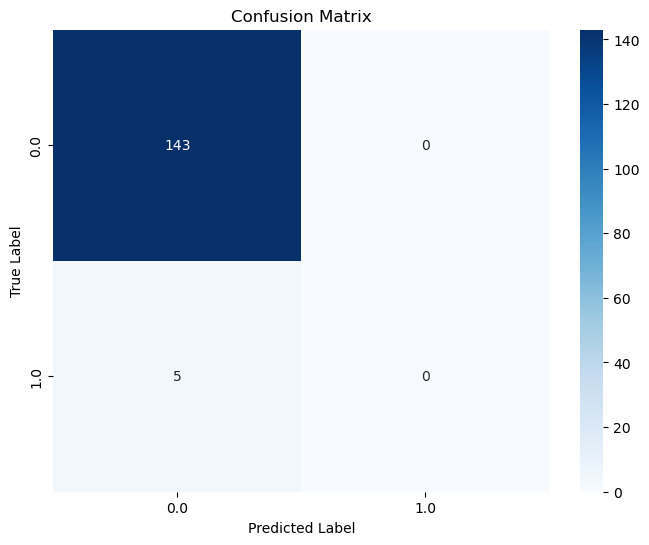

Accuracy: 0.97


In [14]:
import pandas as pd
import numpy as np
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import HillClimbSearch, BicScore, MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

# Assuming 'train_data' is your original dataset that includes 'Dx' as the target variable.

# Your existing code...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the number of elements in the training and testing sets
print(f"Number of elements in the training set: {X_train.shape[0]}")
print(f"Number of elements in the testing set: {X_test.shape[0]}")

# Step 2: Perform structure learning on the training data
hc = HillClimbSearch(pd.concat([X_train, y_train], axis=1))  # Concatenate to include the target for structure learning
best_model = hc.estimate(scoring_method=BicScore(pd.concat([X_train, y_train], axis=1)))

# Display learned structure
print("Learned structure:", best_model.edges())

# Step 3: Create Bayesian Network with learned structure
model = BayesianNetwork(best_model.edges())

# Fit the model to the training data with Maximum Likelihood Estimator
model.fit(pd.concat([X_train, y_train], axis=1), estimator=MaximumLikelihoodEstimator)
inference = VariableElimination(model)

# **NEW CODE**: Visualizing the Bayesian Network
def plot_bayesian_network(model):
    # Create a directed graph from the Bayesian Network model
    graph = nx.DiGraph()
    graph.add_edges_from(model.edges())

    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(graph)  # Layout for the graph
    nx.draw(graph, pos, with_labels=True, arrows=True, node_size=2000, node_color='skyblue', font_size=10, font_color='black', font_weight='bold')
    plt.title('Bayesian Network Structure')
    plt.show()

plot_bayesian_network(model)

# Continue with your existing code...
# Step 4: Prepare the test data for predictions
model_nodes = set(model.nodes())
X_test_filtered = X_test.loc[:, X_test.columns.intersection(model_nodes)]
print(X_test_filtered.isnull().sum())

# Initialize predictions list
y_pred = []

# Step 5: Make predictions on the test set
for i in range(len(X_test_filtered)):
    # Filter evidence to include only model nodes and drop NaNs
    evidence = {k: v for k, v in X_test_filtered.iloc[i].to_dict().items() if k in model_nodes and pd.notna(v)}

    # Debugging: Print the evidence for the current test instance
    print(f"Evidence for index {i}: {evidence}")

    # Ensure evidence is not empty
    if evidence:
        try:
            prediction = inference.map_query(variables=['Dx'], evidence=evidence)
            y_pred.append(prediction['Dx'])
        except Exception as e:
            print(f"Error predicting for index {i}: {e}")
            y_pred.append(None)  # Append None or a default value if prediction fails
    else:
        print(f"No valid evidence for index {i}, skipping prediction.")
        y_pred.append(None)

# Step 6: Evaluate the model performance
if y_pred:
    print("Evaluating model performance...")
    # Ensure the predictions and true values are of the same length
    y_true = y_test.values  # True values from the test set
    # Filter None values from predictions and true values
    valid_indices = [index for index, pred in enumerate(y_pred) if pred is not None]
    y_pred_valid = [y_pred[index] for index in valid_indices]
    y_true_valid = [y_true[index] for index in valid_indices]
    
    # Ensure y_pred_valid and y_true_valid are of equal length for evaluation
    if len(y_pred_valid) == len(y_true_valid):
        # Calculate confusion matrix and classification report
        cm = confusion_matrix(y_true_valid, y_pred_valid)
        report = classification_report(y_true_valid, y_pred_valid)

        # Print confusion matrix and classification report
        print("Confusion Matrix:")
        print(cm)
        print("\nClassification Report:")
        print(report)

        # Visualize the confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title('Confusion Matrix')
        plt.show()

        # Calculate accuracy
        accuracy = accuracy_score(y_true_valid, y_pred_valid)
        print(f'Accuracy: {accuracy:.2f}')
    else:
        print("Mismatch in lengths of predictions and true values after filtering.")
else:
    print("No predictions were made.")
